#Student Name: Jithin Raghunathan
#Student Number: GH1032193
#Module code: M606A
#Module Tutor: Prof.Dr.Mahmoudreza Babaei  

#Introduction

Heart Disease is one of the major causes of  worldwide mortality. Timely Identification of individuals with high risk can significantly help them in  improving their health by reducing complication.Machine learning models help us predict the health of patients by analyzing the data and can identify the likelihood of developing such diseases. Also these data driven  models can help medical professionals make informed decisions and promote healthcare strategies.


Features included in the dataset are age, sex, blood pressure, cholesterol levels, fasting blood sugar, ECG results which are important parameters in determining heart health.




#Problem Statement
The main business problem here  is to predict the presence of heart disease based on the given patient data. Early detection of disease can significantly help improve the patients health in addition to this cost burden on health care can also be reduced . This classification task focuses on identifying patients at risk and also ensure that timely care is given so as to ensure that complications can be stoped  before they arise.


# 1. Data Collection

#Dataset Overview
The following data set is a publicly available UCI heart disease dataset taken from [kaggle](https://www.kaggle.com/).This dataset has been created by combining five separate heart disease dataset  including the Cleveland Clinic Foundation, Hungarian Institute of Cardiology, and hospitals in Switzerland and the United States. This dataset has a different set of features like age, gender, Resting heart Rate, Cholesterol and other important clinical indicators which play a vital role in predicting the heart health of a person. In Here I will aim to create a model by taking these features so that this can help in better prediction of patients heart health and can further prove to be a lifesaver.

#Importing Libraries

In [ ]:
import pandas as pd
import sklearn.model_selection
import sklearn.compose
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/jithin6384/machinelearning/refs/heads/master/datasets/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#Here we can see that we have different paramaters like Age Sex chest Pain type Resting BP Cholesterol among others which play a vital role in predicting heart health  

#HeartDiesease   here is the target label which has values in the form of 0 and 1 which gives a classic case of Binary classifcation so we can go with many  classisfcation algorithms starting with logistic regression but before that we have to do a full Exploratory data analysis to see how different features affect the heart dieases so that we can remove some features for noise cancellation to give a better model

#2. Exploratory Data Analysis

# Checking the types of data

In [ ]:
print(df.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [ ]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


#We can observe that columns like Sex ChestPainType RestingECG  Excercise Angima and ST_Slope are objects and rest columns including RestingBP Cholestrol FastingBS MAxHR and Heart Diease are numerical

#Next we will check if any column has null or NAN values

In [ ]:
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


#Here we can see that no column has null values so we dont need any data imputation techniques for this dataset

#now we will check the among total number of person how many have heart dieaseas to see the balance of data

Total Patients: 918
Patients with Heart Disease (1)
508
Patients without Heart Disease (0)
410
percentage 
55.33769063180828
44.66230936819172


<ipython-input-6-577808797e28>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette='Set2')


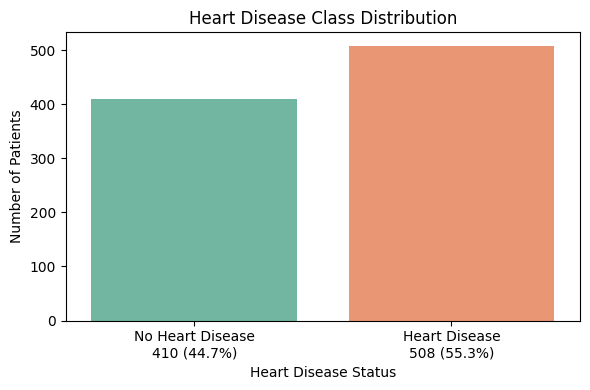

In [ ]:


num_with_disease = df[df['HeartDisease'] == 1].shape[0]
num_without_disease = df[df['HeartDisease'] == 0].shape[0]
total = df.shape[0]

print(f"Total Patients: {total}")
print("Patients with Heart Disease (1)" )
print(num_with_disease)
print("Patients without Heart Disease (0)")
print(num_without_disease)
print("percentage ")
with_disease_pct = (num_with_disease / total) * 100
without_disease_pct = (num_without_disease / total) * 100
print(with_disease_pct)
print(without_disease_pct)

labels = [f'No Heart Disease\n{num_without_disease} ({without_disease_pct:.1f}%)', f'Heart Disease\n{num_with_disease} ({with_disease_pct:.1f}%)']
counts = [num_without_disease, num_with_disease]

plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=counts, palette='Set2')
plt.title('Heart Disease Class Distribution')
plt.xlabel('Heart Disease Status')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

#We can observe that dataset is moderately balanced with 55 percent falling in heart dieases and 45 percent without heart dieases so we can assume that we dont need to balance this data using smote or any other balancing techinques

#Next we will check the relation between different dataset and heart dieases
In here we will see the relation between parameters like Age gender chest pain type cholestrol etc with heart dieases

<Axes: >

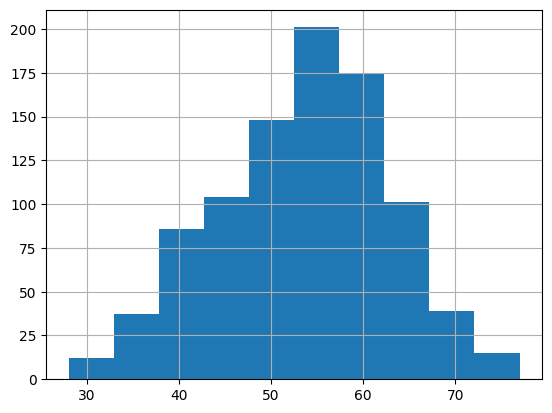

In [ ]:
df['Age'].hist()

# we can check that the age is normally distributed with slight left skeweness so this is apt for standardization and next we will check the distribution of all numerical columns in this way

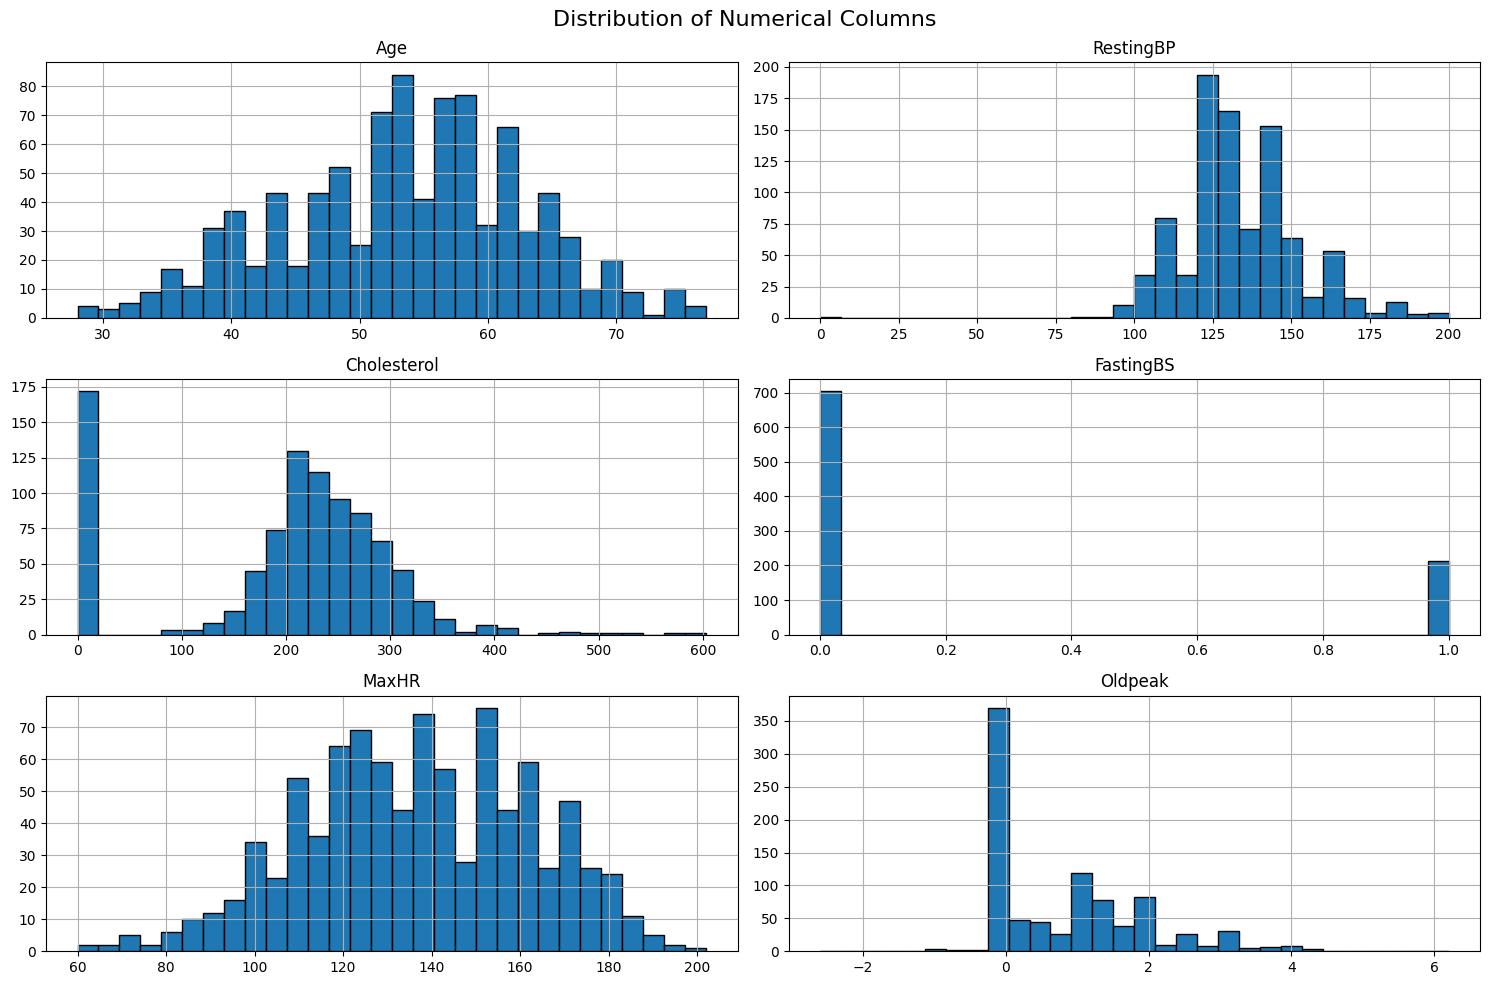

In [ ]:
import matplotlib.pyplot as plt

# Select numerical columns
# Dropping the target label for checking as we cant use it to standardize the data
numerical_columns = df.drop('HeartDisease', axis=1).select_dtypes(include=['int64', 'float64']).columns

# Plot histograms
df[numerical_columns].hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Columns", fontsize=16)
plt.tight_layout()
plt.show()


# Observations


1.   We can observe that data in numerical columns mostly follows the normal distribution with no outliers.
2.   However, in case of cholestrol we can see that there are some outliers in the data with a few group having values at 500 and 600(unsuall high) and some group 175 having less than 100(low).
3.  We have Fasting Blood sugar which is binary classification in the form of 0 and 1 and Old peak which is a right skewed data






#Now lets us the relation of caetgorical columns with target labels

In [ ]:
def plot_heart_category_bar_chart(data, category_column, target_column='HeartDisease'):
    grouped = data.groupby(category_column)[target_column].mean().sort_values(ascending=False)
    print('labels')

    print(grouped.index)
    new_labels = [f"{idx} ({value*100:.1f}%)" for idx, value in zip(grouped.index, grouped.values)]
    plt.figure(figsize=(10, 5))
    sns.barplot(x=new_labels, y=grouped.values, palette="coolwarm")
    plt.xticks(rotation=30, ha="right")
    plt.title(f"Average Heart Disease Rate by {category_column}")
    plt.ylabel("Proportion with Heart Disease")
    plt.xlabel(category_column)
    plt.tight_layout()
    plt.show()



Relation between age and heart **dieases**

labels
CategoricalIndex(['56-70', '71-85', '41-55', '25-40'], categories=['25-40', '41-55', '56-70', '71-85'], ordered=True, dtype='category', name='AgeGroup')


<ipython-input-44-477263b6cd6a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(category_column)[target_column].mean().sort_values(ascending=False)
<ipython-input-44-477263b6cd6a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=new_labels, y=grouped.values, palette="coolwarm")


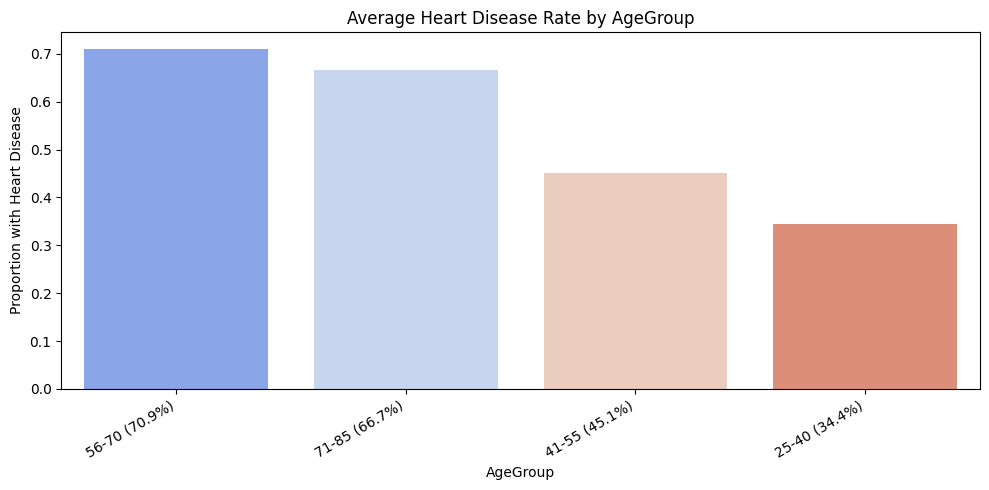

In [ ]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[25, 40, 55, 70, 85], labels=['25-40', '41-55', '56-70', '71-85'])
plot_heart_category_bar_chart(df, 'AgeGroup')


#Observations


1.   We can observe that in this dataset out of the total population in the age group (56 to 70)  71 percent has heart diseases which make them highest.
2.   71 to 85 is next with 66 percent of their total falling in heart disease group

3. Least is 25 to 40 age group with 34 percent among thier population.




Relation between gender and heart dieases

labels
Index(['M', 'F'], dtype='object', name='Sex')


<ipython-input-44-477263b6cd6a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=new_labels, y=grouped.values, palette="coolwarm")


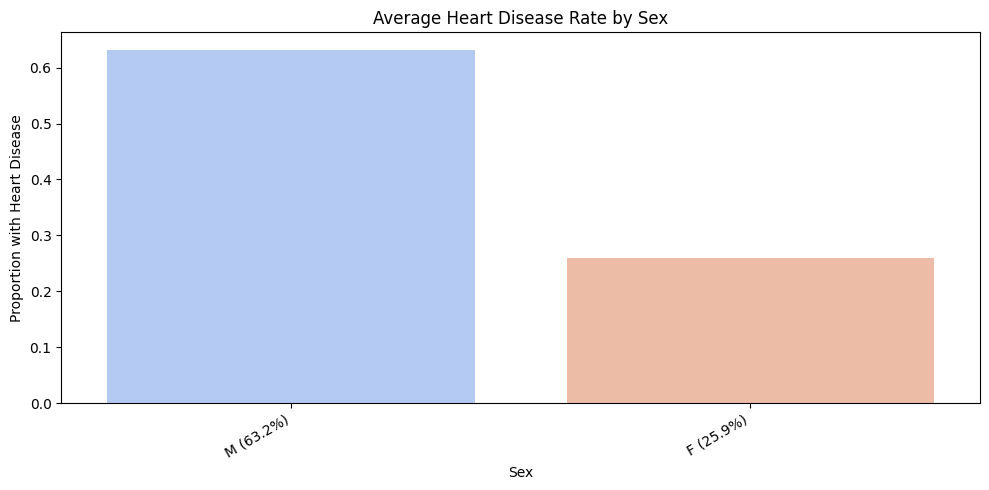

In [ ]:
plot_heart_category_bar_chart(df, 'Sex')

# Observations


1.  We can observe that males are most effected group with 63.2 percent out of the total male population having heart dieases
2.   25.9 percent of females among all the female group has heart dieases



#how chest pain affects heart dieases

labels
Index(['ASY', 'TA', 'NAP', 'ATA'], dtype='object', name='ChestPainType')


<ipython-input-44-477263b6cd6a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=new_labels, y=grouped.values, palette="coolwarm")


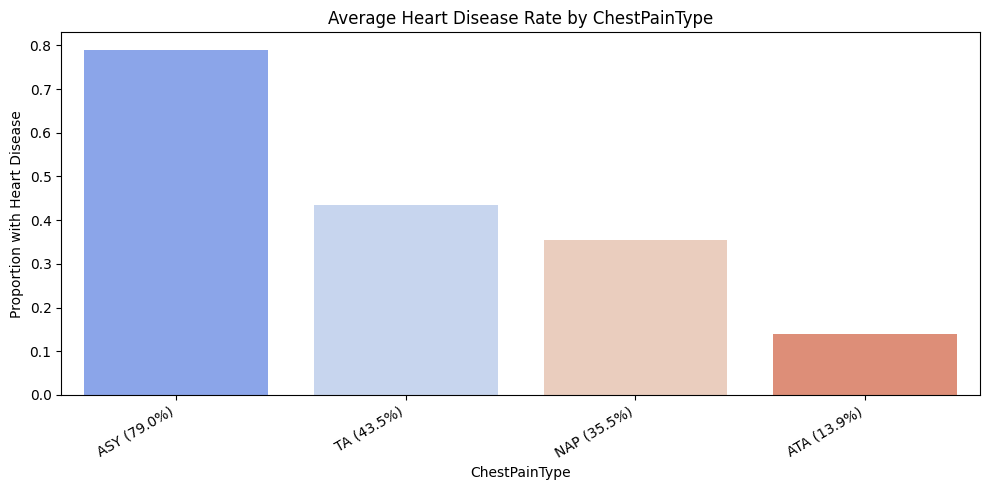

In [ ]:
plot_heart_category_bar_chart(df, 'ChestPainType')

#From Chest pain plotting with respect to heart diseases we can observe that

1.   chest pain types ASY(79 %) and TA (43.5 %) are the biggest risk factors for dieases
2.    ATA	Atypical Angina	and NAP	Non-Anginal Pain	are on least risk side









#Next we will see other categorical features like  



1.   Exercise Angina
2.   Resting ECG
3.  ST Slope


labels
Index(['ST', 'LVH', 'Normal'], dtype='object', name='RestingECG')


<ipython-input-44-477263b6cd6a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=new_labels, y=grouped.values, palette="coolwarm")


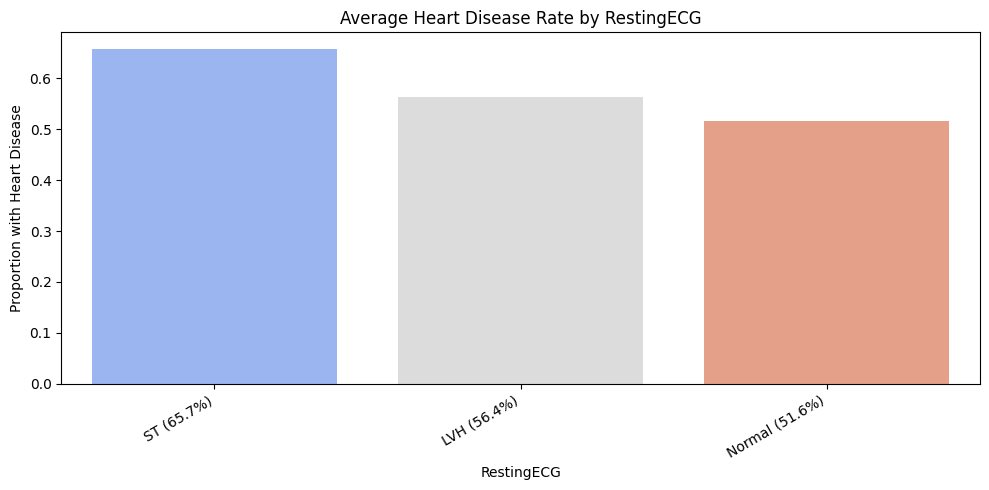

In [ ]:
plot_heart_category_bar_chart(df, 'RestingECG')

#Resting ECG Indicates


1.  people with ST-T wave abnormality has 65.7 percent in heart dieases group

2.   people with LVH(Left ventrical hypotrohy) has 56 percent.
3. suprisingly, people with normal ECG also has more than 51 percent heart dieases.



labels
Index(['Flat', 'Down', 'Up'], dtype='object', name='ST_Slope')


<ipython-input-44-477263b6cd6a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=new_labels, y=grouped.values, palette="coolwarm")


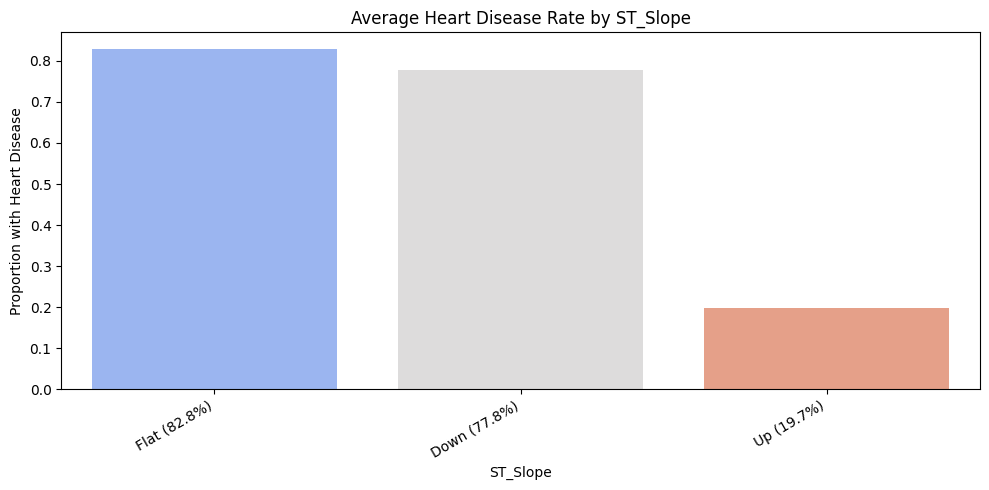

In [ ]:
plot_heart_category_bar_chart(df, 'ST_Slope')

#ST_Slope of ECG represents


1.  Flat group are at high risk 82.8 percent
2.   Down is next with 77.8 percent
3. Up is among the least with 19.7 pecent



#Now converting high risk columns like Flat and Down into binary 1 and UP into 0

In [ ]:
df_plot = df.copy()


# Mapping Yes to 1 and No to 0
df_plot['ExerciseAnginaMapped'] = df_plot['ExerciseAngina'].map({'N': 0, 'Y': 1})


# Mapping 0 to 0 and anything above 0 like 1 or 1.5 to 1
df_plot['OldpeakMapped'] = df_plot['Oldpeak'].apply(lambda x: 0 if x == 0 else 1)

# Map ST_Slope: 'Down' -> 0 (healthier), 'Flat' and 'Up' -> 1 (risk indicators)
# Mapoing 'Up' to 0 and 'Down' to 1
df_plot['ST_SlopeMapped'] = df_plot['ST_Slope'].map({'Down': 0, 'Flat': 1, 'Up': 1})



 Again checking the datatypes for df plot


In [ ]:
df_plot.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


#Since now we have mapped the values of old beat St Slope and Excerice engima in 1 and 0 now we will check their direct corelation with the target label



In [ ]:
# Define the columns to check
mapped_cols = ['ExerciseAnginaMapped', 'OldpeakMapped', 'ST_SlopeMapped']

# Compare each with HeartDisease and compute match percentage
for col in mapped_cols:
    matches = (df_plot[col] == df_plot['HeartDisease']).sum()
    total = len(df_plot)
    percentage_match = (matches / total) * 100
    print(f"{col} matches HeartDisease in {matches}/{total} rows ({percentage_match:.2f}%)")


ExerciseAnginaMapped matches HeartDisease in 671/918 rows (73.09%)
OldpeakMapped matches HeartDisease in 628/918 rows (68.41%)
ST_SlopeMapped matches HeartDisease in 473/918 rows (51.53%)


#Because we have mapped columns like ST_slope, Excercise Enigma and Old peak into numeric we can drop them from the dataset to avoid confusion

In [ ]:
df_plot = df_plot.drop(['ExerciseAngina', 'ST_Slope', 'Oldpeak'], axis=1)


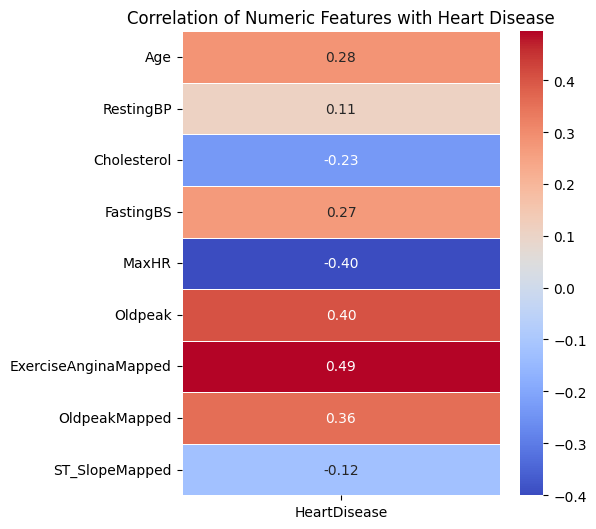

In [ ]:


# Select all numeric columns, including mapped + target
numerical_attributes = df_plot.select_dtypes(include=['int64', 'float64']).columns
corr_features = df_plot[numerical_attributes]

# Compute correlation matrix
correlation_matrix = corr_features.corr()

# Extract correlation only with HeartDisease
correlation_with_target = correlation_matrix[['HeartDisease']].drop('HeartDisease')

# Plot focused heatmap
plt.figure(figsize=(6, len(correlation_with_target) * 0.6))  # Dynamic height
sns.heatmap(correlation_with_target, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation of Numeric Features with Heart Disease")
plt.tight_layout()
plt.show()



#Summary of Correlation matrix


1.   **ExerciseAnginaMapped** : +0.49	shows strongest positive correlation people  with exercise induced angina(mapped as 1)  are more likely to have heart disease. This feature is very relevant
2.  **OldpeakMapped** : +0.36 Shows positive correlation.Valid and important
3. **FastingBS**: +0.27	High fasting blood sugar has a slight risk.
4. **Age	**: +0.28 increases with age
5. **RestingBP**: +0.11 show a very	 weak correlation this can not be used alone to strongly predict.
6. **ST_SlopeMapped** : −0.12	Slight negative correlation seems to align more with disease.
7.**Cholesterol** : −0.23 This has 	surprisingly negative correlation.
8. **MaxHR**	−0.40	Shows strong negative correlation.




#**Data Preprocessing and Feature Engineering**

#Spliting the data into train test

In [ ]:
df_train, df_test = sklearn.model_selection.train_test_split(df_plot, test_size=0.2, random_state=42)
print("df total shape =>", df_plot.shape)
print("df train shape =>", df_train.shape)
print("df test shape =>", df_test.shape)

df total shape => (918, 16)
df train shape => (734, 16)
df test shape => (184, 16)


#Dropping the target labels from both train and test

In [ ]:
y_train = df_train['HeartDisease']
y_test = df_test['HeartDisease']
x_train = df_train.drop('HeartDisease', axis =1)
x_test = df_test.drop('HeartDisease', axis = 1)

#We have seen that in this data there are no outliers that need imputation so next we will transform the numerical column by StandardScaler and Encoding the categorical column

In [ ]:
from sklearn.compose import ColumnTransformer
print(x_train)
numerical_attributes  = x_train.select_dtypes(include=['int64', 'float64']).columns
#excluding fasting sugar as it data in binary format
# numerical_attributes = [col for col in numerical_attributes if col != 'FastingBS']
categorical_attributes  = x_train.select_dtypes(include=['object']).columns
# x_train = pd.DataFrame(x_train, columns=numerical_attributes.tolist() + categorical_attributes.tolist())
# x_test = pd.DataFrame(x_test, columns=x_train.columns)
print("numerical attributes ==> ", numerical_attributes)
print("categorical attributes ==>", categorical_attributes)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
795   42   M           NAP        120          240          1     Normal   
25    36   M           NAP        130          209          0     Normal   
84    56   M           ASY        150          213          1     Normal   
10    37   F           NAP        130          211          0     Normal   
344   51   M           ASY        120            0          1     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
106   48   F           ASY        120          254          0         ST   
270   45   M           ASY        120          225          0     Normal   
860   60   M           ASY        130          253          0     Normal   
435   60   M           ASY        152            0          0         ST   
102   40   F           ASY        150          392          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope AgeGroup  ExerciseAnginaMapped  \
795    19

In [ ]:
preprocessor = ColumnTransformer([
    ("standard_scaling", StandardScaler(), numerical_attributes),
    ("one_hot_encoder", OneHotEncoder(handle_unknown="ignore"), categorical_attributes)
])
preprocessor.fit(x_train)


x_train = preprocessor.transform(x_train)
x_test = preprocessor.transform(x_test)
# Ensure it's a DataFrame
# x_train = pd.DataFrame(x_train, columns=numerical_attributes.tolist() + categorical_attributes.tolist())
# x_test = pd.DataFrame(x_test, columns=x_train.columns)  # Match column structure
print("x train shape ", x_train.shape)
print("x test shape ", x_test.shape)

x train shape  (734, 23)
x test shape  (184, 23)


#Model Training

#After data preprocessing model training is the step remaining Since this is a binary classification algorithm lets first go with Logistic regression and then with other classification algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8315217391304348


# we got a accracy score of 83 percent now we will follow hyperparameter tuning using grid search and see if we can improve this score

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# X = df_plot.drop('HeartDisease', axis=1)
# y = df_plot['HeartDisease']

X_train, Y_test = sklearn.model_selection.train_test_split(df_plot, test_size=0.2, random_state=42)

y_train = X_train['HeartDisease']
y_test = Y_test['HeartDisease']
x_train = X_train.drop('HeartDisease', axis =1)
x_test = Y_test.drop('HeartDisease', axis = 1)

numerical_attributes  = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_attributes  = x_train.select_dtypes(include=['object']).columns

models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

preprocessor = ColumnTransformer(
    transformers=[
        ('standard scaling', StandardScaler(), numerical_attributes),
        ('one hot encoding', OneHotEncoder(handle_unknown='ignore'), categorical_attributes)
    ]
)

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])


#Defining Parameter Grids

In [ ]:
param_grids = {
    'Random Forest': {
        'classifier__max_depth': range(3, 15, 2),
        'classifier__min_samples_split': range(2, 10, 2),
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 10],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan']
    },

    'Gradient Boosting': {
        'classifier__learning_rate': [0.05, 0.1],
        'classifier__n_estimators': [100, 150]
    }
}



#Run GridSearchCV and Make Predictions

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score


def display_different_results(params):
    for name, model in models.items():
        print(f"\n--- {name} ---")
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])

        if name in param_grids:
            grid = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
            grid.fit(x_train, y_train)
            best_model = grid.best_estimator_
            y_pred = best_model.predict(x_test)
            # print(f"Best Params: {grid.best_params_}")
        else:
            pipeline.fit(x_train, y_train)
            y_pred = pipeline.predict(x_test)

        # Evaluate
        if(params == "Accuracy "):
            print("Accuracy:", accuracy_score(y_test, y_pred))
        if(params == "Classification Report"):
           print("Classification Report:\n", classification_report(y_test, y_pred))
        if(params == "Precision"):
            prec = precision_score(y_test, y_pred)
            print(f"Precision: {prec:.2f}")
        if(params == "Recall"):
             rec = recall_score(y_test, y_pred)
             print(f"Recall: {rec:.2f}")
        if(params == "F1-Score"):
            f1 = f1_score(y_test, y_pred)
            print(f"F1-Score: {f1:.2f}")
        if(params == "confusion matrix"):
            cm = confusion_matrix(y_test, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.title(f"Confusion Matrix - {name}")
            plt.xlabel("Predicted")
            plt.ylabel("Actual")
            plt.show()




#Accuracy and Classification report

In [ ]:
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Random Forest
# print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
# print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

# # KNN
# print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
# print("KNN Report:\n", classification_report(y_test, y_pred_knn))

display_different_results("Accuracy")
display_different_results("Classification Report")





--- Logistic Regression ---

--- Random Forest ---

--- KNN ---

--- Gradient Boosting ---

--- Logistic Regression ---
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81        77
           1       0.90      0.80      0.85       107

    accuracy                           0.83       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.83      0.83       184


--- Random Forest ---
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.90      0.89      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184


--- KNN ---
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        77
        

#Precision Recall And F1 Score

In [ ]:
display_different_results("Precision")
display_different_results("Recall")
display_different_results("F1-Score")


--- Logistic Regression ---
Precision: 0.90

--- Random Forest ---
Best Params: {'classifier__max_depth': 11, 'classifier__min_samples_split': 2}
Precision: 0.90

--- KNN ---
Best Params: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 7, 'classifier__weights': 'distance'}
Precision: 0.88

--- Gradient Boosting ---
Best Params: {'classifier__learning_rate': 0.05, 'classifier__n_estimators': 150}
Precision: 0.92

--- Logistic Regression ---
Recall: 0.80

--- Random Forest ---
Best Params: {'classifier__max_depth': 11, 'classifier__min_samples_split': 2}
Recall: 0.89

--- KNN ---
Best Params: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 7, 'classifier__weights': 'distance'}
Recall: 0.88

--- Gradient Boosting ---
Best Params: {'classifier__learning_rate': 0.05, 'classifier__n_estimators': 150}
Recall: 0.87

--- Logistic Regression ---
F1-Score: 0.85

--- Random Forest ---
Best Params: {'classifier__max_depth': 11, 'classifier__min_samples_split': 2}
F1-S

#Confusion Matrix


--- Logistic Regression ---


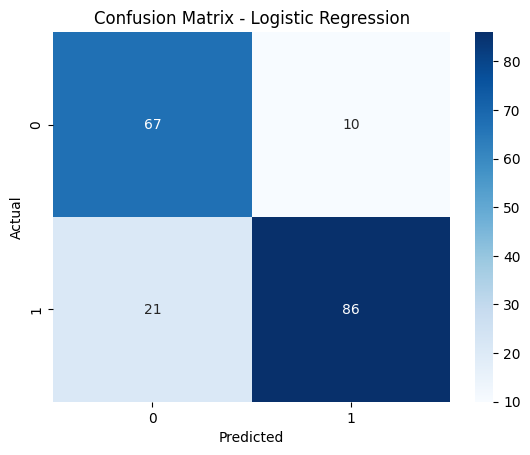


--- Random Forest ---
Best Params: {'classifier__max_depth': 11, 'classifier__min_samples_split': 2}


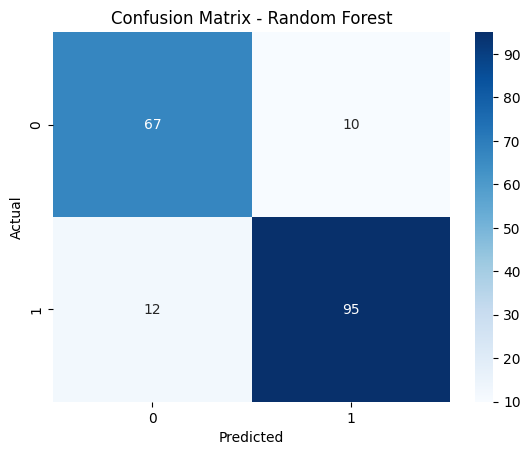


--- KNN ---
Best Params: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 7, 'classifier__weights': 'distance'}


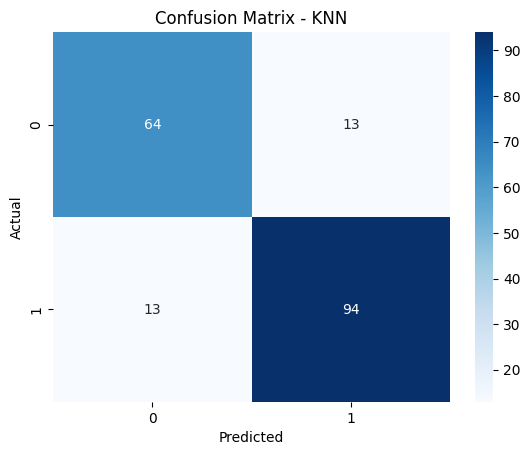


--- Gradient Boosting ---
Best Params: {'classifier__learning_rate': 0.05, 'classifier__n_estimators': 150}


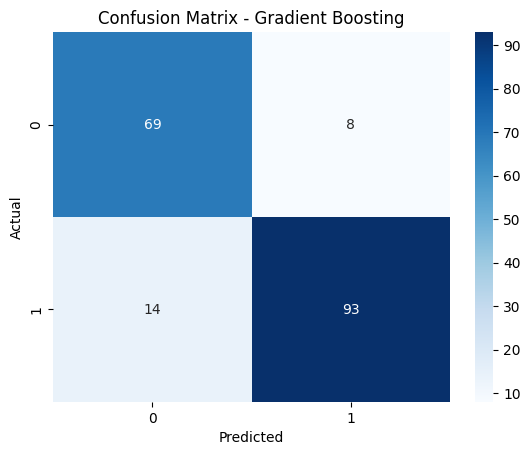

In [ ]:


display_different_results("confusion matrix")




#**Conclusion**
In this project a machine learning pipeline was developed to predict heart diseases based on a given dataset. Different Algorithms like Logistic Regression, Random Forest, K-Nearest Neighbours and Gradient Boosting applying GridSearchCv for hyperparameter tuning were used.
   
Random Forest performed the best by achieving an accuracy of 88 percent, F1 Score 0.90 with precision of 0.90  and recall 0.89 giving a very good balance.

Next best algorithm was Gradient Boosting with accuracy score: 88 percent precision 0.90, recall 0.89 and F1 score 0.90

KNN was third with scores as follows accuracy: 86 percent, precision 0.88 ,recall  0.88,  F1 score 0.88.

Logistic regression despite simplicity gave accuracy score of 83 percent with precision, recall and F1 score being 0.90, 0.80 and .85 respectively



#**Future Works**

The current model makes use parameters derived from ECG like ST_slope chest pain type in future this model can be improved to take into consideration easily available parameters like cholesterol age gender resting heart rate etc making this more practical model for general public

Also, the scope of the dataset can be improved by taking into account a wider range of dataset which has more ethnic groups data.
Further this can be deployed as a mobile or web app where people can enter their different parameters like age, cholesterol etc to get a realistic result if they are under threat or not.

#**References**

Soriani,F. (2022).Heart Failure Prediction. Retrieved from https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
